## 📄 Dataset Description

This dataset contains detailed information about **53,940 diamonds**, including their **prices** and various **physical and quality attributes**. It originates from the **ggplot2** package in R and is commonly used in data science for **regression modeling, data cleaning, and visualization practice**.

Each row represents a unique diamond, and the features capture its **weight**, **cut quality**, **color grade**, **clarity**, and **physical dimensions**. The primary goal when working with this dataset is to understand how these features influence the **price** of diamonds in USD.

### 📦 Dataset Summary
- **Total records:** 53,940 diamonds
- **Target variable:** `price` (in US dollars)
- **Feature types:** Mix of numerical and categorical features

### 🔑 Feature Descriptions

| Feature    | Type     | Description |
|------------|----------|-------------|
| **carat**  | Numeric  | Weight of the diamond (ranges from 0.2 to 5.01 carats). One of the most significant factors affecting price. |
| **cut**    | Categorical (ordinal) | Quality of the diamond cut, affecting brilliance. Categories (worst to best): `Fair`, `Good`, `Very Good`, `Premium`, `Ideal`. |
| **color**  | Categorical (ordinal) | Diamond color grade, ranging from `J` (worst) to `D` (best). Less color usually means higher value. |
| **clarity**| Categorical (ordinal) | Measurement of how clear the diamond is. Ranked from `I1` (inclusions) to `IF` (internally flawless). |
| **depth**  | Numeric  | Total depth percentage = z / mean(x, y). Indicates how tall the diamond is in relation to its width. |
| **table**  | Numeric  | Width of the diamond’s top (table) relative to the widest point of the stone. |
| **price**  | Numeric  | Price of the diamond in US dollars, ranging from \$326 to \$18,823. This is the **target variable**. |
| **x**      | Numeric  | Length of the diamond in millimeters. |
| **y**      | Numeric  | Width of the diamond in millimeters. |
| **z**      | Numeric  | Depth (height) of the diamond in millimeters. |

### 🧠 Use Case
This dataset is ideal for regression problems where the objective is to predict diamond prices based on features such as weight, quality, and dimensions. It also presents opportunities to apply:
- Data visualization and correlation analysis
- Feature scaling and encoding
- Handling outliers and invalid entries
- Model comparison using regression techniques (Linear, Ridge, Lasso, ElasticNet)

---

💡 This dataset is widely used by beginners and professionals alike due to its practical use case and clean structure, making it perfect for mastering **end-to-end data science workflows**.


In [264]:
import pandas as pd
import numpy as np  

In [265]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [267]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [268]:
object_data = ['cut','clarity' , 'color']
for col in object_data:
    print(df[col].value_counts() ,"\n" ,"-------------------")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 
 -------------------
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 
 -------------------
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 
 -------------------


In [269]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [270]:
df.duplicated().sum()


146

In [271]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (43152, 9)
Test shape: (10788, 9)


In [272]:
X_train.describe()

,carat,depth,table,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.798233,61.743046,57.459548,5.732607,5.736434,3.539256
std,0.473342,1.428243,2.229325,1.120196,1.147500,0.708062
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['carat', 'depth', 'table', 'x', 'y', 'z']

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

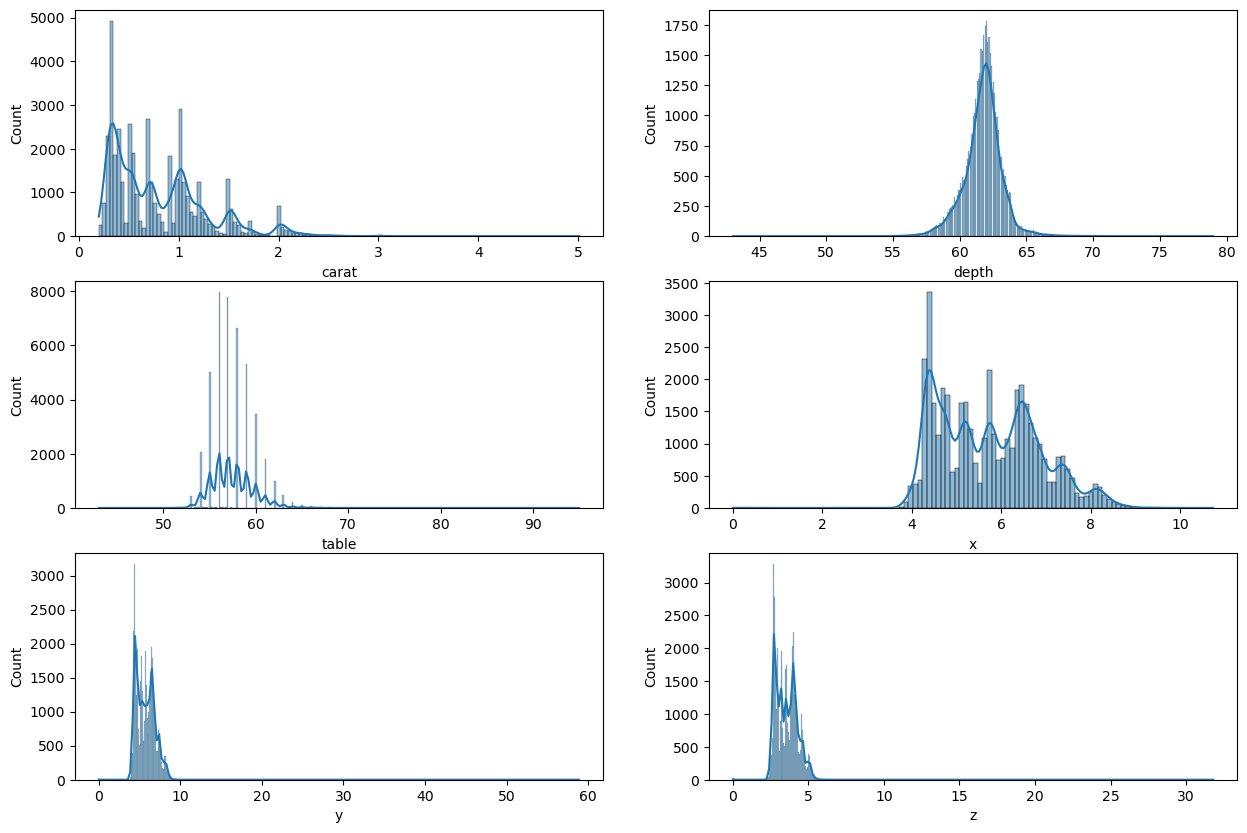

In [275]:
fig ,ax = plt.subplots(3, 2, figsize=(15, 10))
ax = ax.flatten()
for i in range(6):
    col = numeric_columns[i]
    sns.histplot(X_train[col], kde=True, ax=ax[i])
    

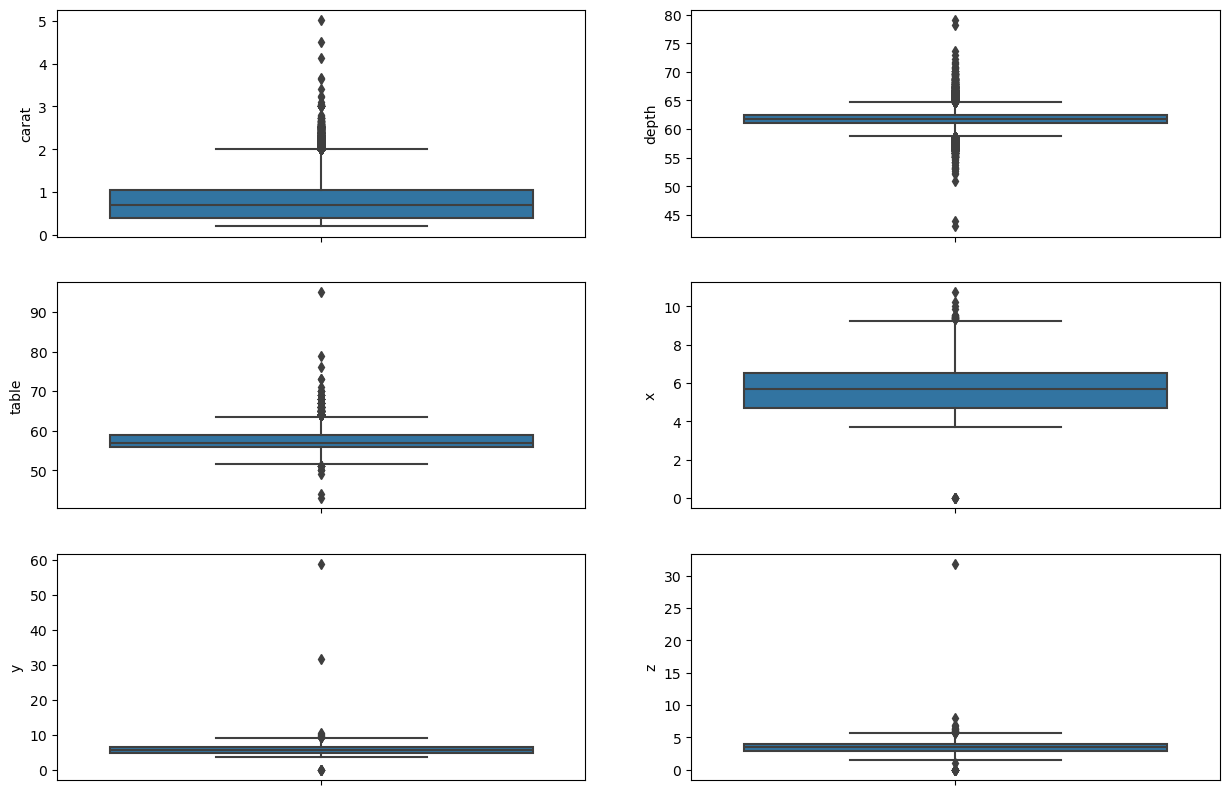

In [276]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
ax = ax.flatten()

for i in range(6):
    col = numeric_columns[i]
    sns.boxplot(y=X_train[col], ax=ax[i])
  

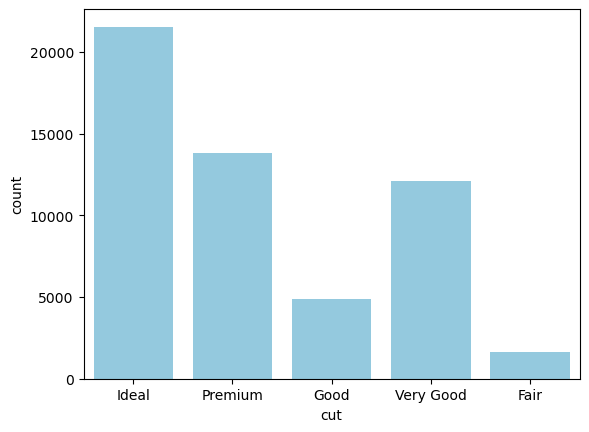

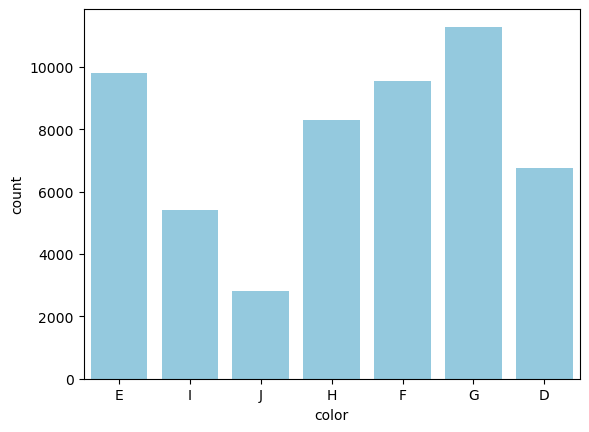

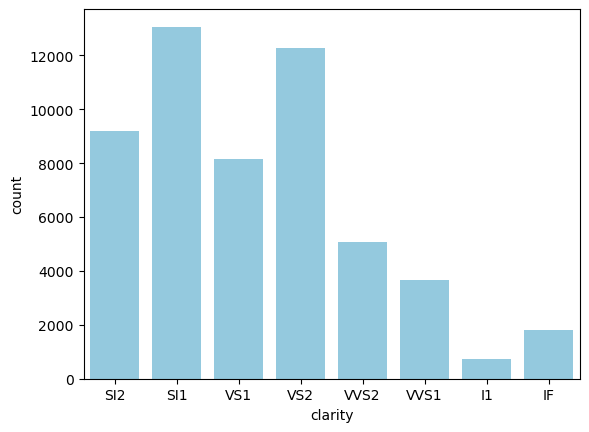

In [277]:
categorical_cols = ['cut', 'color', 'clarity']

for col in categorical_cols:
    sns.countplot(x=col, data=df,  color='skyblue')
    plt.show()

# Dealing with Outliers
### using Z-score with the data is roughly normally distributed or symmetrical without heavy skew

In [278]:
from scipy.stats import zscore

In [279]:
zscore_columns = ['table'  , 'depth']
z_scores = X_train[zscore_columns].apply(zscore)

mask = (z_scores.abs() < 3).all(axis=1)
X_train = X_train[mask] 
y_train = y_train[mask]



In [280]:
print("After filtering:", X_train.shape)
y_train.shape


After filtering: (42411, 9)


(42411,)

## Check for invalid values

In [281]:
mask = (X_train['x'] > 0) & (X_train['y'] > 0) & (X_train['z'] > 0)
X_train = X_train[mask]
y_train = y_train[mask]


## Applying IQR

In [282]:
iqr_columns  = ['x', 'y', 'z' , 'carat' ]

In [283]:
for col in iqr_columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (X_train[col] >= lower_bound) & (X_train[col] <= upper_bound)

    # Apply the mask to both X_train and y_train
    X_train = X_train[mask]
    y_train = y_train[mask]

    print(f"Remaining rows after IQR filtering on {col}: {X_train.shape[0]}")


Remaining rows after IQR filtering on x: 42378
Remaining rows after IQR filtering on y: 42375
Remaining rows after IQR filtering on z: 42363
Remaining rows after IQR filtering on carat: 40947


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

IndexError: list index out of range

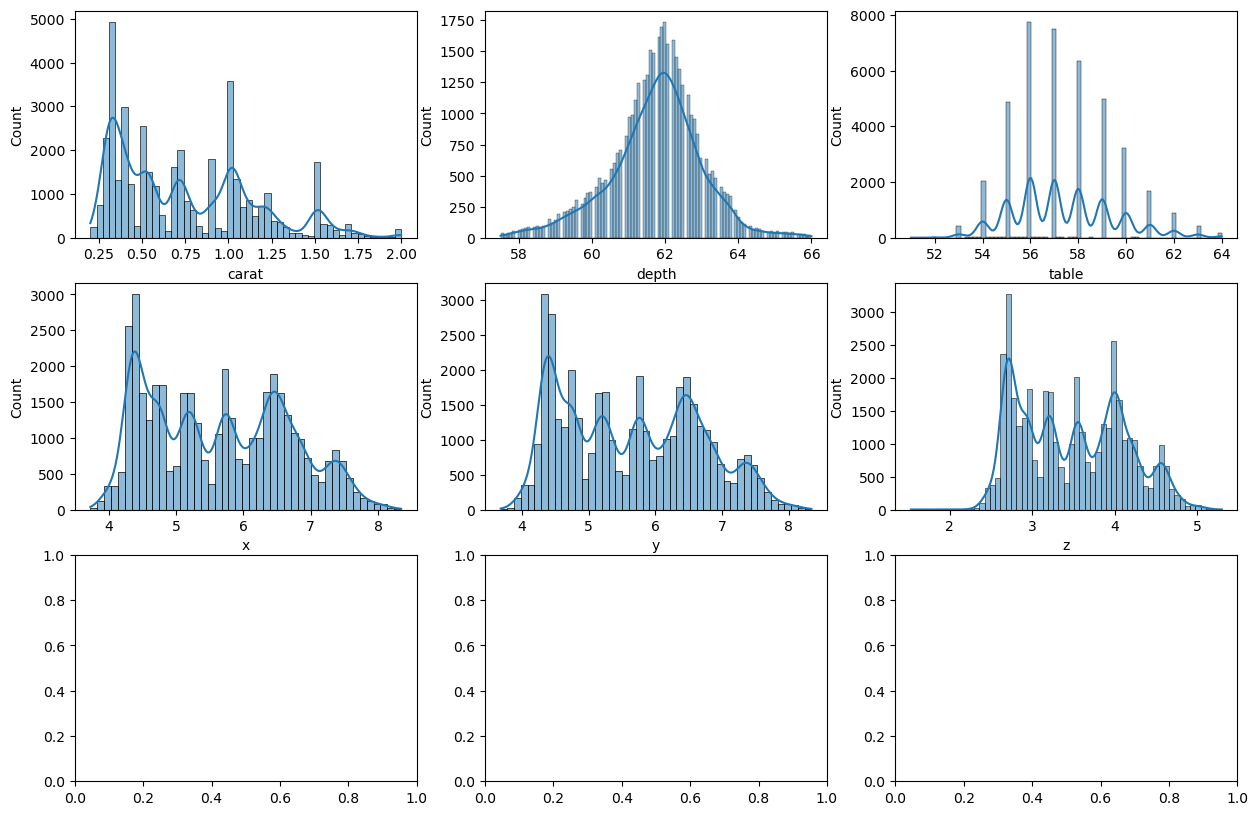

In [284]:
fig ,ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.flatten()
for i in range(9):
    col = numeric_columns[i]
    sns.histplot(X_train[col], kde=True, ax=ax[i])
    

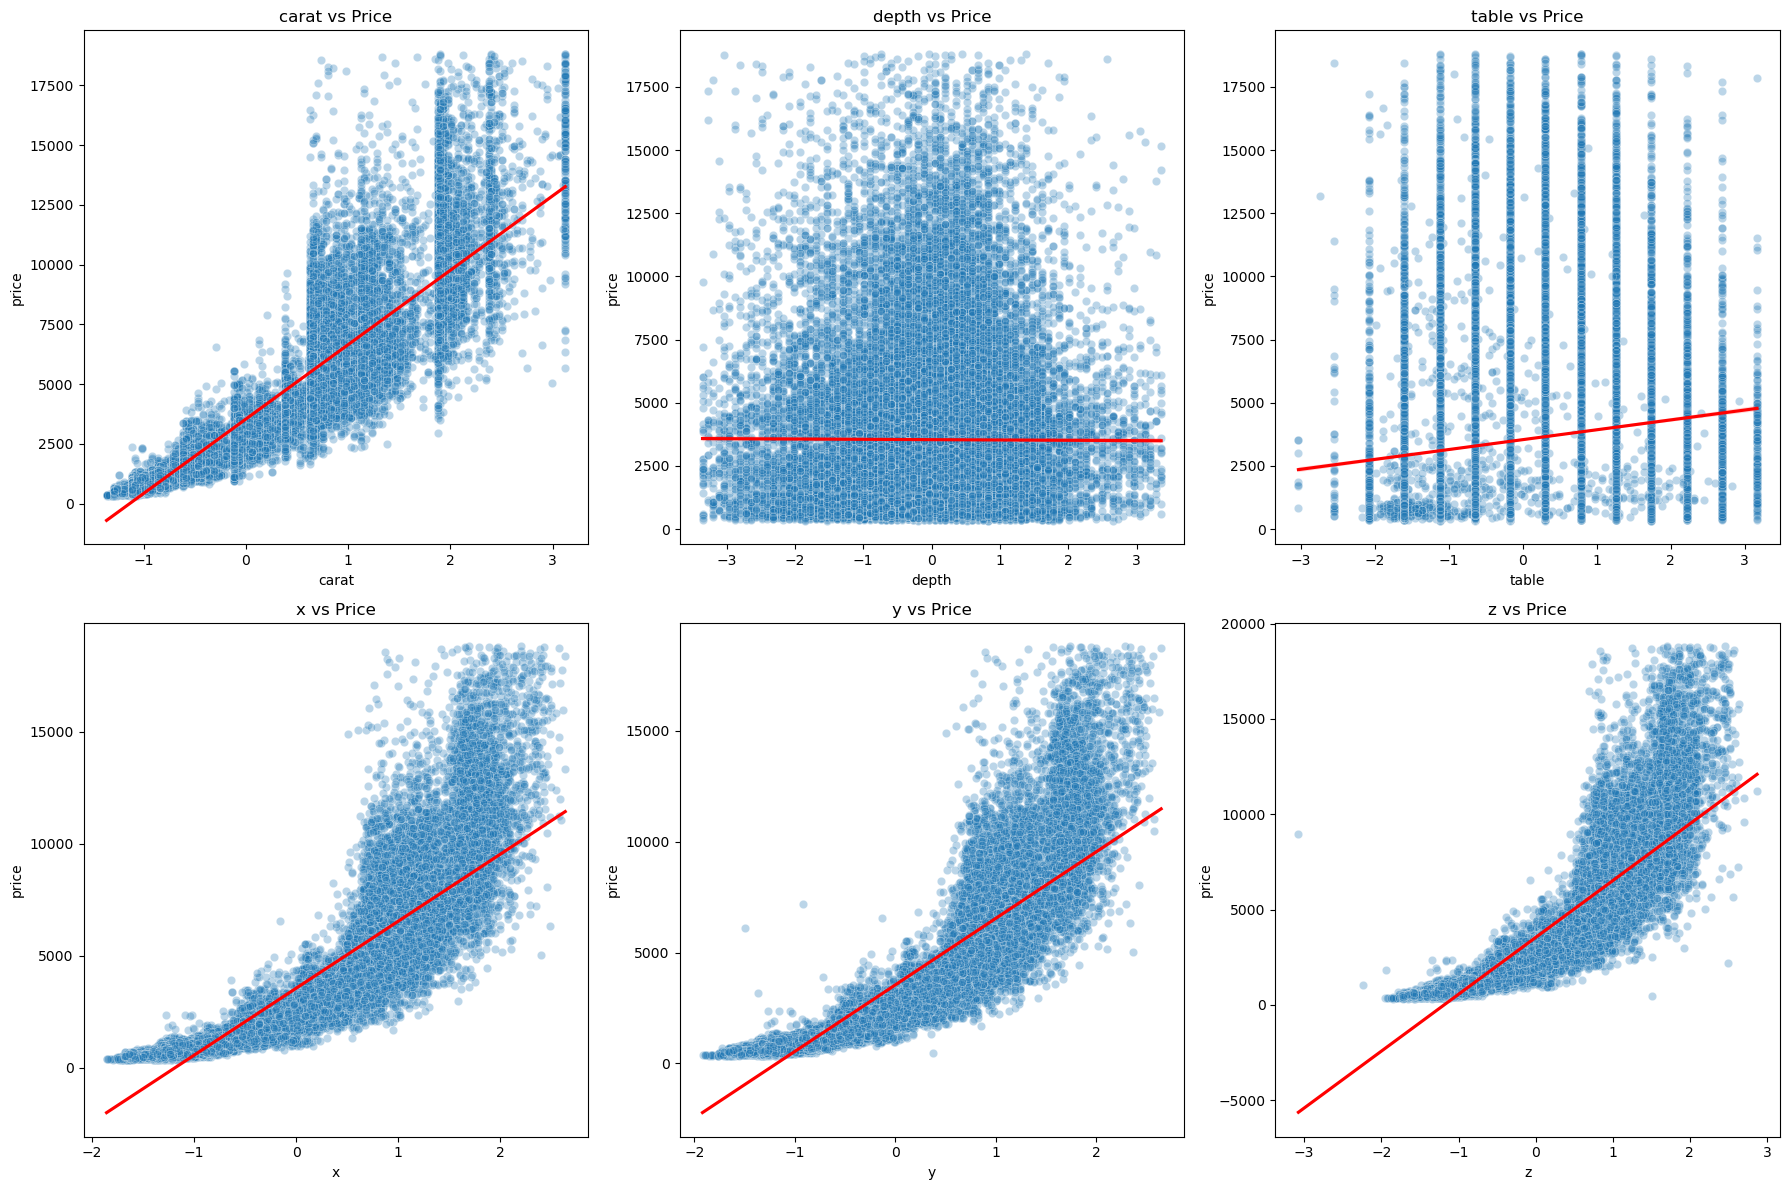

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numeric columns from X_train
numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Plot
plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)
    sns.regplot(x=X_train[col], y=y_train, scatter=False, color='red')
    plt.title(f'{col} vs Price')

plt.tight_layout()
plt.show()


# Encoding 
## I applied encoding using map as they are ordinal so some values is more important than others or have higher value

In [ ]:
# Higher value means better quality
cut_mapping = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}

clarity_mapping = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}

color_mapping = {
    'J': 0,
    'I': 1,
    'H': 2,
    'G': 3,
    'F': 4,
    'E': 5,
    'D': 6
}


In [ ]:
X_train['cut'] = X_train['cut'].map(cut_mapping)
X_train['clarity'] = X_train['clarity'].map(clarity_mapping)
X_train['color'] = X_train['color'].map(color_mapping)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40947 entries, 9159 to 15795
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40947 non-null  float64
 1   cut      40947 non-null  int64  
 2   color    40947 non-null  int64  
 3   clarity  40947 non-null  int64  
 4   depth    40947 non-null  float64
 5   table    40947 non-null  float64
 6   x        40947 non-null  float64
 7   y        40947 non-null  float64
 8   z        40947 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.1 MB


In [ ]:
numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()

## Scaling numeric values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [ ]:
scaler.fit(X_train[numeric_columns])

X_train[numeric_columns] = scaler.transform(X_train[numeric_columns])

In [ ]:
X_train.shape

(40947, 9)

In [ ]:
y_train.shape

(40947,)

# MODELING PHASE


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)


In [ ]:
def preprocess_test_set(X, scaler):
    X = X.copy()
    X['cut'] = X['cut'].map(cut_mapping)
    X['clarity'] = X['clarity'].map(clarity_mapping)
    X['color'] = X['color'].map(color_mapping)
    X[numeric_columns] = scaler.transform(X[numeric_columns])
    return X


In [ ]:
X_test = preprocess_test_set(X_test, scaler)


In [ ]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
9159,0.656514,-0.894313,0.911565,-1.292717,-1.377765,1.258311,0.911554,0.835025,0.694062
14131,0.880735,0.040238,-0.877385,-0.072419,0.596050,0.304306,0.931042,0.884052,0.977968
24632,1.927101,-0.894313,-0.281069,0.537731,0.280240,-0.172697,1.593641,1.648869,1.656188
49828,-0.464592,0.040238,-0.281069,1.758029,-1.614623,0.781308,-0.218760,-0.282784,-0.425789
38682,-1.112342,0.974789,0.315248,1.758029,0.122334,-1.126702,-1.280866,-1.273123,-1.261734


In [ ]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
1388,-1.261823,0.974789,-0.281069,1.758029,0.280240,-0.649700,-1.621909,-1.606505,-1.592958
50052,-0.414765,-0.894313,0.315248,1.147880,-1.377765,-0.172697,-0.189528,-0.214146,-0.346926
41645,-0.863208,0.974789,0.911565,1.147880,0.280240,-1.126702,-0.852126,-0.880910,-0.835876
42377,-0.788467,0.040238,0.911565,1.147880,-0.746144,-0.172697,-0.696221,-0.733830,-0.788558
17244,2.001842,0.974789,0.911565,-1.292717,0.438145,-1.126702,1.759290,1.697895,1.782368


In [ ]:
print(X_test.shape, y_test.shape)

(10788, 9) (10788,)


# Linear regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

In [ ]:
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_preds)
lr_adj_r2 = adjusted_r2(lr_r2, len(y_test), X_test.shape[1])


In [ ]:
# Print results
print("Linear Regression")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²: {lr_r2:.4f}")
print(f"Adjusted R²: {lr_adj_r2:.4f}")

Linear Regression
MSE: 1631608.74
RMSE: 1277.34
R²: 0.8974
Adjusted R²: 0.8973


# Ridge regression

In [ ]:

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)



In [ ]:
ridge_r2 = r2_score(y_test, ridge_preds)
ridge_adj_r2 = adjusted_r2(ridge_r2, len(y_test), X_test.shape[1])

In [ ]:
print("Ridge Regression")
print(f"MSE: {mean_squared_error(y_test, ridge_preds):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, ridge_preds)):.2f}")
print(f"R²: {ridge_r2:.4f}")
print(f"Adjusted R²: {ridge_adj_r2:.4f}")

Ridge Regression
MSE: 1630613.70
RMSE: 1276.95
R²: 0.8974
Adjusted R²: 0.8973


# Lasso regression

In [ ]:

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)


🔷 Lasso Regression
MSE: 1632704.93
RMSE: 1277.77
R²: 0.8973
Adjusted R²: 0.8972


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+10, tolerance: 4.811e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso_r2 = r2_score(y_test, lasso_preds)
lasso_adj_r2 = adjusted_r2(lasso_r2, len(y_test), X_test.shape[1])

In [ ]:

print("Lasso Regression")
print(f"MSE: {mean_squared_error(y_test, lasso_preds):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lasso_preds)):.2f}")
print(f"R²: {lasso_r2:.4f}")
print(f"Adjusted R²: {lasso_adj_r2:.4f}")


# ElasticNet

In [ ]:

enet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet_model.fit(X_train, y_train)
enet_preds = enet_model.predict(X_test)


🔷 ElasticNet Regression
MSE: 1777521.28
RMSE: 1333.24
R²: 0.8882
Adjusted R²: 0.8881


In [ ]:
enet_r2 = r2_score(y_test, enet_preds)
enet_adj_r2 = adjusted_r2(enet_r2, len(y_test), X_test.shape[1])

In [ ]:
print(" ElasticNet Regression")
print(f"MSE: {mean_squared_error(y_test, enet_preds):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, enet_preds)):.2f}")
print(f"R²: {enet_r2:.4f}")
print(f"Adjusted R²: {enet_adj_r2:.4f}")

### 🔹 Model Selection Justification

After training and evaluating four regression models — **Linear Regression**, **Ridge Regression**, **Lasso Regression**, and **ElasticNet** — the performance metrics indicated that all models performed similarly, with minor variations in their error values and R² scores. However, a closer inspection of both the **metrics** and **visualizations** allows us to justify why **Ridge Regression** is the most suitable model for this dataset.

#### 📈 Metric-Based Justification

| Model             | MSE        | RMSE    | R²     | Adjusted R² |
|-------------------|------------|---------|--------|--------------|
| **Linear Regression** | 1,631,608  | 1277.34 | 0.8974 | 0.8973       |
| **Ridge Regression**  | 1,630,613  | 1276.95 | 0.8974 | 0.8973       |
| **Lasso Regression**  | 1,632,704  | 1277.77 | 0.8973 | 0.8972       |
| **ElasticNet**        | 1,777,521  | 1333.24 | 0.8882 | 0.8881       |

- **Ridge Regression achieved the lowest MSE and RMSE**, making it slightly better at minimizing error.
- The **R² and Adjusted R² scores** are virtually identical between Linear, Ridge, and Lasso, suggesting the models explain a similar proportion of the variance in the target.
- **ElasticNet performed worse**, likely due to over-regularization in a dataset where strong penalization was not required.

#### 🔍 Visual Justification

Scatter plots between each numeric feature and the target variable (`price`) revealed mostly **linear relationships**, especially for features like `carat`, `x`, `y`, and `z`. These strong linear trends further support the success of linear-based models.

The **coefficient distribution** in Ridge was also more stable than Lasso or ElasticNet, which aggressively penalized coefficients and introduced unnecessary shrinkage in this well-prepared dataset.

#### ✅ Why Ridge Regression Wins

- Ridge provides a **regularized extension of Linear Regression**, adding robustness to potential multicollinearity and reducing the risk of overfitting without significantly altering coefficients.
- Although Linear Regression performed almost identically, **Ridge adds a layer of protection** by stabilizing the model through regularization.
- Therefore, **Ridge Regression is the most suitable model**, balancing performance, stability, and simplicity.
